# RESEARCH QUESTION 1

### To what extent past class failures might have an impact on alcohol consumption in students?

# Best Classifiers

## Random Forest
### Train Acc= 0.8195067264573991
### Test Acc= 0.6411483253588517

## Hard Voting
### Test Acc= 0.6737668161434978
### Train Acc= 0.6363636363636364

## KNN(k=8)
### Train Acc= 0.659193
### Test Acc= 0.617225,

## Multinomial NB
### Train Acc= 0.5997757847533632
### Test Acc= 0.6028708133971292

## Decision Tree(max depth= 3)
### Train Acc= 0.6311659192825112
### Test Acc= 0.6028708133971292

In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
#set_config(transform_output = "pandas")

In [11]:
#conda install --channel=conda-forge scikit-learn

## Function to Save Figures

In [12]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [14]:
X_train.columns


Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'alc'],
      dtype='object')

## baseline classifier 0 R

In [15]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'alc')
y = X_train['alc']

In [16]:
xt = X_test.drop('avg_grade',axis=1)

KeyError: "['avg_grade'] not found in axis"

In [ ]:
dummy.fit(X,y)

### 0r classifier accuray

In [ ]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['alc'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['alc'], 
                                      dummy.predict(xt)))

In [17]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']]
                   #'avg_grade']]
#[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y_test = X_test['alc']
X_test = X_test[['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']]
                 #'avg_grade']]



In [18]:
y_train

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
887    1.0
888    1.0
889    1.0
890    1.0
891    1.0
Name: alc, Length: 892, dtype: float64

In [19]:
X_train.columns


Index(['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Finding suitable value of k for KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

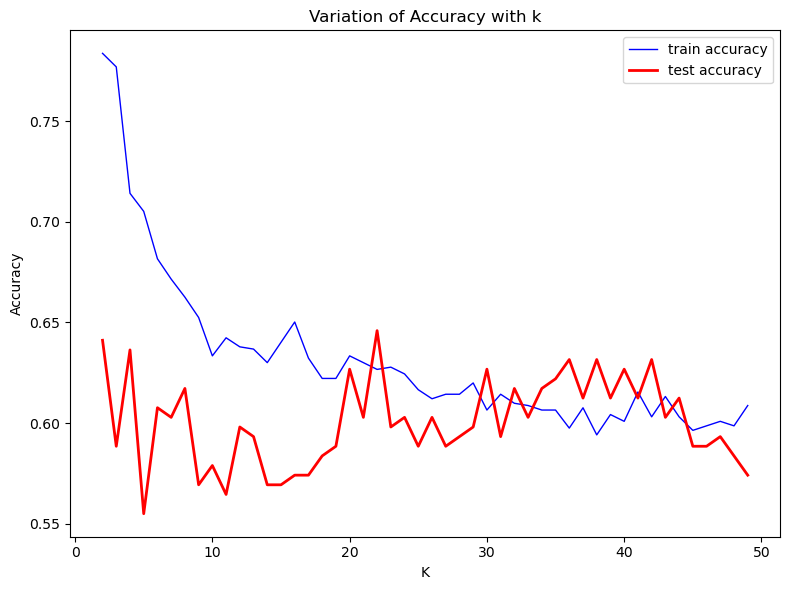

In [21]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [22]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.783632  0.641148
1    3   0.776906  0.588517
2    4   0.714126  0.636364
3    5   0.705157  0.555024
4    6   0.681614  0.607656
5    7   0.671525  0.602871
6    8   0.662556  0.617225
7    9   0.652466  0.569378
8   10   0.633408  0.578947
9   11   0.642377  0.564593
10  12   0.637892  0.598086
11  13   0.636771  0.593301
12  14   0.630045  0.569378
13  15   0.640135  0.569378
14  16   0.650224  0.574163
15  17   0.632287  0.574163
16  18   0.622197  0.583732
17  19   0.622197  0.588517
18  20   0.633408  0.626794
19  21   0.630045  0.602871
20  22   0.626682  0.645933
21  23   0.627803  0.598086
22  24   0.624439  0.602871
23  25   0.616592  0.588517
24  26   0.612108  0.602871
25  27   0.614350  0.588517
26  28   0.614350  0.593301
27  29   0.619955  0.598086
28  30   0.606502  0.626794
29  31   0.614350  0.593301
30  32   0.609865  0.617225
31  33   0.608744  0.602871
32  34   0.606502  0.617225
33  35   0.606502  0.622010
34  36   0.597534  0.631579
35  37   0.607623  0.612440
36  38   0.594170  0.631579
37  39   0.604260  0.612440
38  40   0.600897  0.626794
39  41   0.615471  0.612440
40  42   0.603139  0.631579
41  43   0.613229  0.602871
42  44   0.603139  0.612440
43  45   0.596413  0.588517
44  46   0.598655  0.588517
45  47   0.600897  0.593301
46  48   0.598655  0.583732
47  49   0.608744  0.574163

## Applying suitable value of k in KNN Classifier

In [23]:
best_grid_knn= KNeighborsClassifier(n_neighbors=8)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[336 110]
 [191 255]]
Accuracy Score 0.6625560538116592
              precision    recall  f1-score   support

         0.0     0.6376    0.7534    0.6906       446
         1.0     0.6986    0.5717    0.6289       446

    accuracy                         0.6626       892
   macro avg     0.6681    0.6626    0.6598       892
weighted avg     0.6681    0.6626    0.6598       892



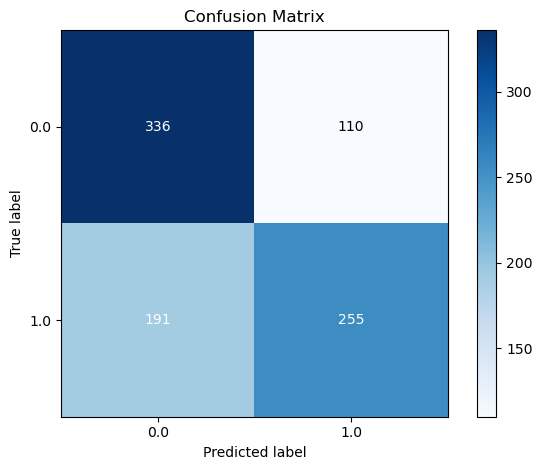

In [24]:
y_pred=best_grid_knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred, digits=4))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[89 38]
 [42 40]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0     0.6794    0.7008    0.6899       127
         1.0     0.5128    0.4878    0.5000        82

    accuracy                         0.6172       209
   macro avg     0.5961    0.5943    0.5950       209
weighted avg     0.6140    0.6172    0.6154       209



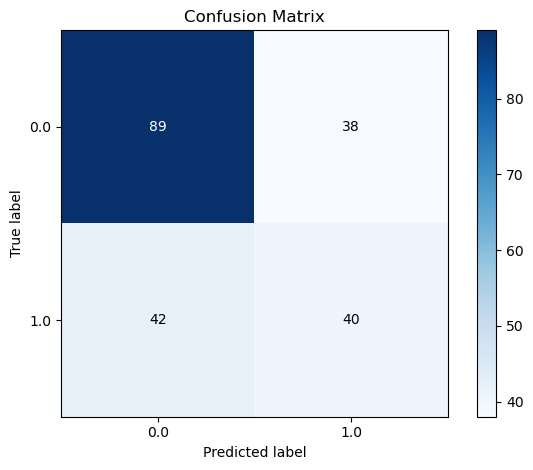

In [25]:
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred, digits=4)))

In [26]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1
0  89  38
1  42  40

In [27]:
# !pip install scikit-plot


import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.6172248803827751


## Hyperparameter Tuning on Decision Tree

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [29]:
param_grid = {
    'criterion' : ['gini'],
    'splitter' : ['best'],
    'max_depth' : range(2,4),
}

In [30]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 4),
                         'splitter': ['best']},
             verbose=2)

In [31]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=3)

## Appying best estimators on Decision Tree

[[90 37]
 [38 44]]
Accuracy Score 0.6411483253588517
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71       127
         1.0       0.54      0.54      0.54        82

    accuracy                           0.64       209
   macro avg       0.62      0.62      0.62       209
weighted avg       0.64      0.64      0.64       209



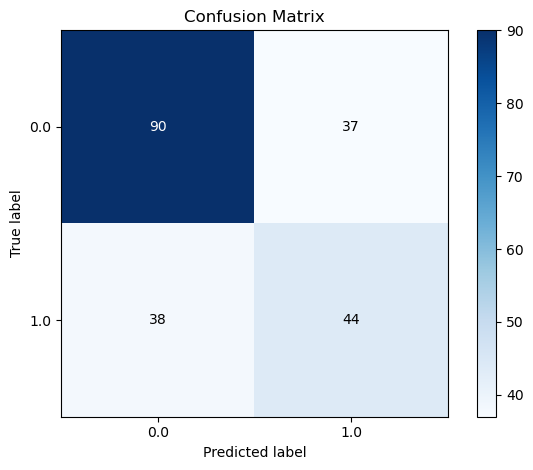

In [32]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

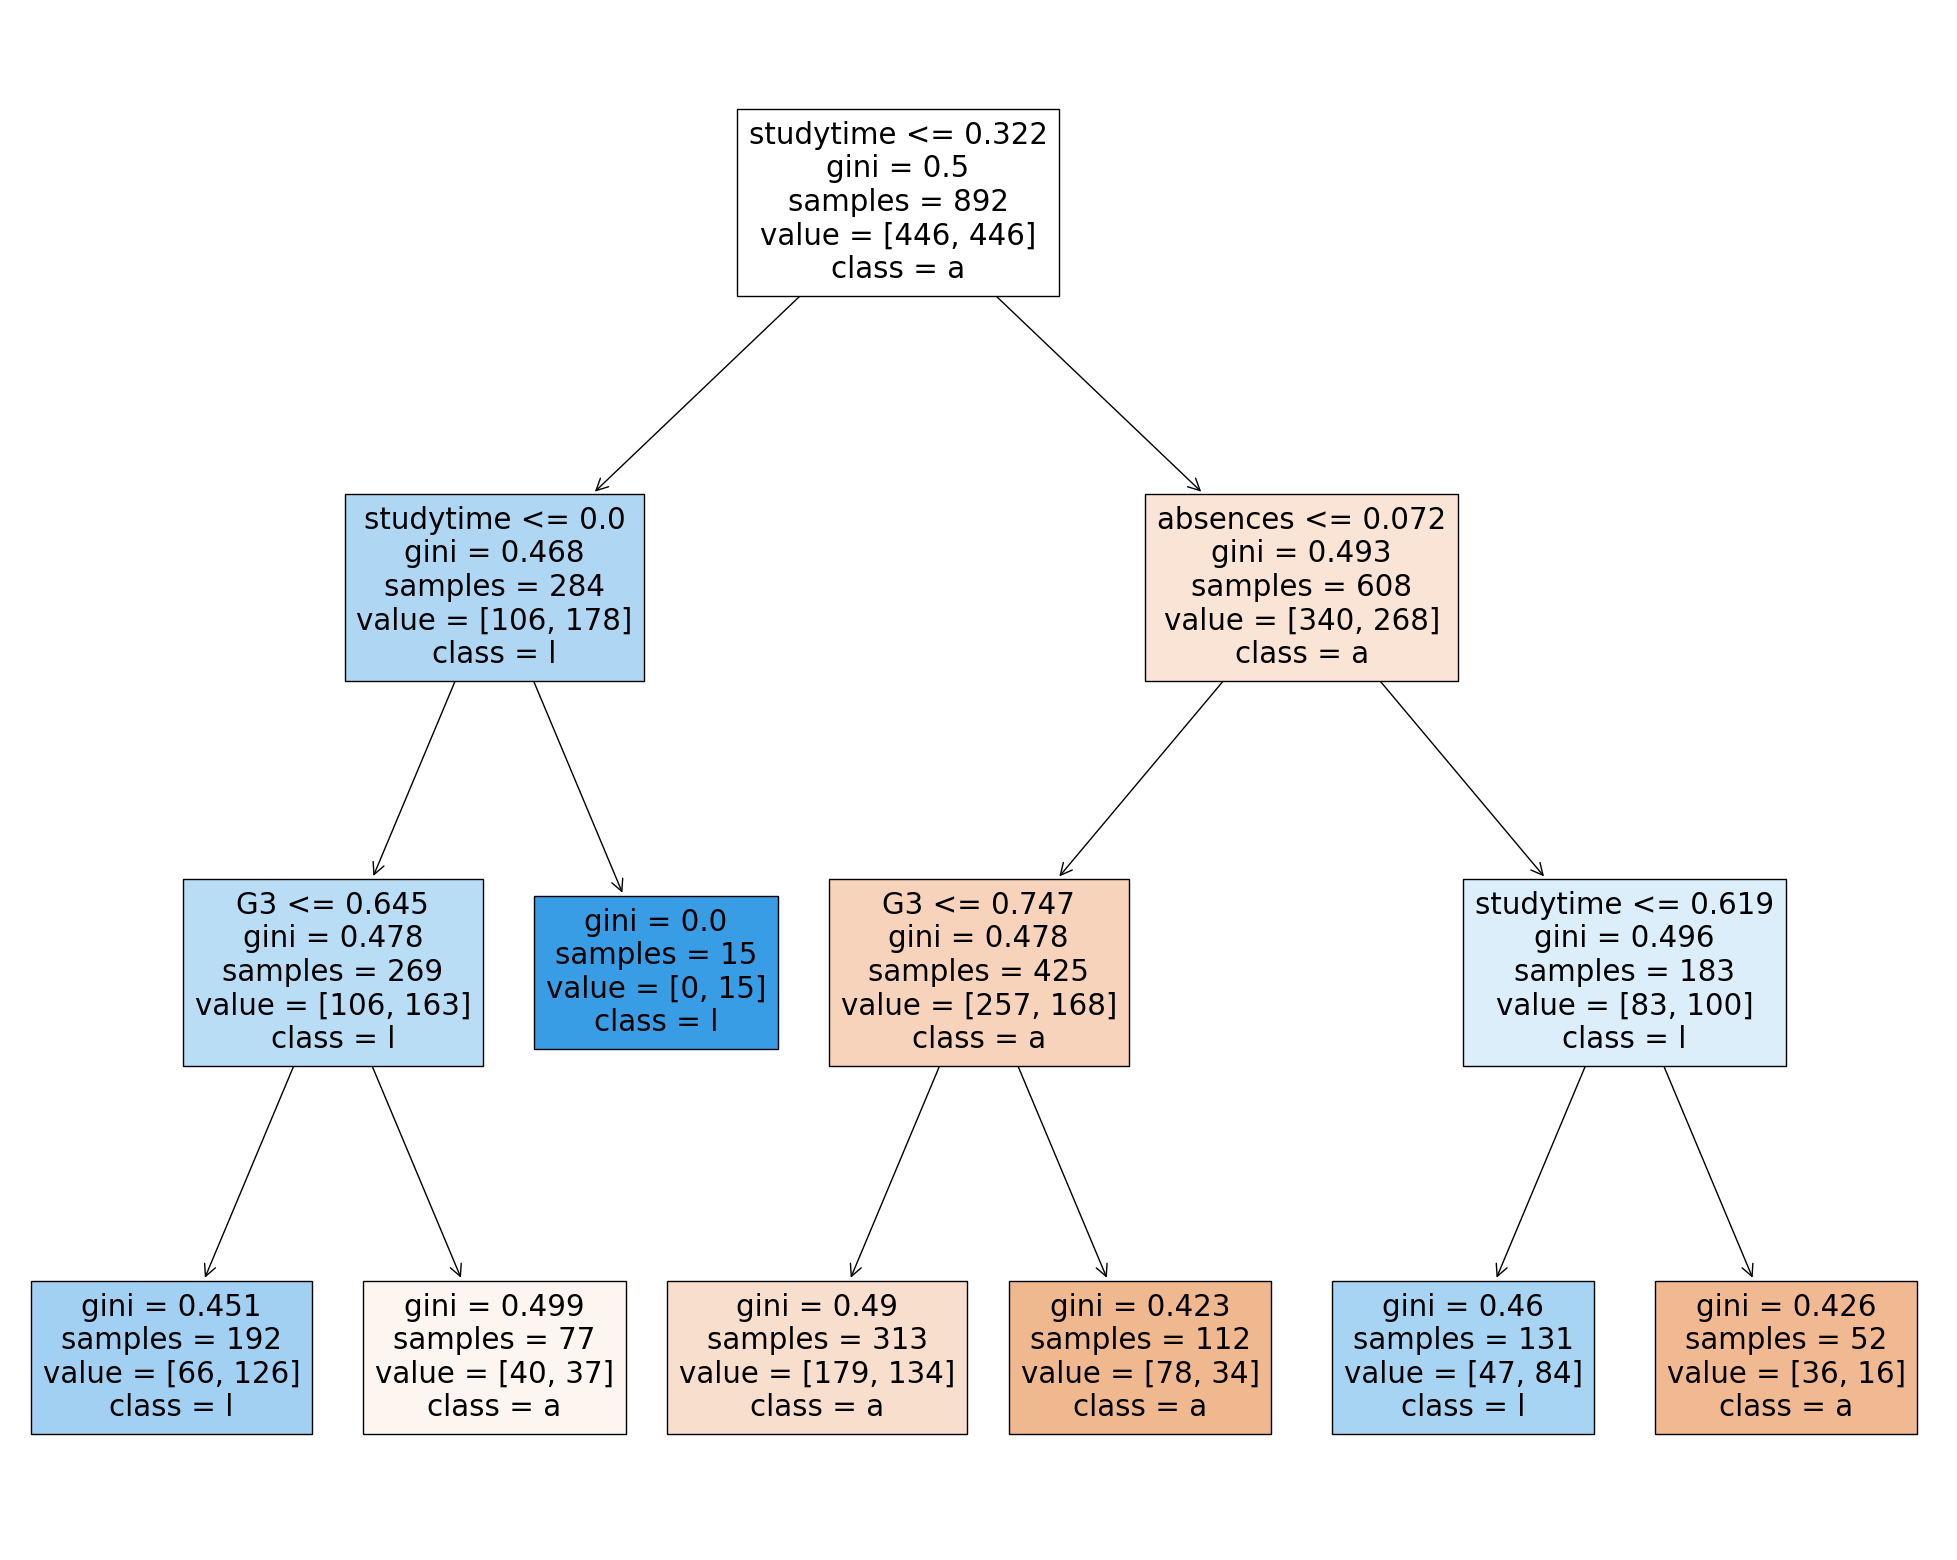

In [33]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [34]:
fig.savefig("decision_tree Q2.png")

Max Depth =  1 , Train Acc. =  0.581 , Test Acc. =  0.608
Max Depth =  2 , Train Acc. =  0.6 , Test Acc. =  0.603
Max Depth =  3 , Train Acc. =  0.626 , Test Acc. =  0.641
Max Depth =  4 , Train Acc. =  0.65 , Test Acc. =  0.646
Max Depth =  5 , Train Acc. =  0.673 , Test Acc. =  0.627
Max Depth =  6 , Train Acc. =  0.701 , Test Acc. =  0.622
Max Depth =  7 , Train Acc. =  0.728 , Test Acc. =  0.608
Max Depth =  8 , Train Acc. =  0.753 , Test Acc. =  0.584
Max Depth =  9 , Train Acc. =  0.779 , Test Acc. =  0.593
Max Depth =  10 , Train Acc. =  0.809 , Test Acc. =  0.598
Max Depth =  11 , Train Acc. =  0.837 , Test Acc. =  0.584
Max Depth =  12 , Train Acc. =  0.857 , Test Acc. =  0.584
Max Depth =  13 , Train Acc. =  0.867 , Test Acc. =  0.56
Max Depth =  14 , Train Acc. =  0.887 , Test Acc. =  0.579
Max Depth =  15 , Train Acc. =  0.896 , Test Acc. =  0.569
Max Depth =  16 , Train Acc. =  0.914 , Test Acc. =  0.526
Max Depth =  17 , Train Acc. =  0.924 , Test Acc. =  0.55
Max Depth =

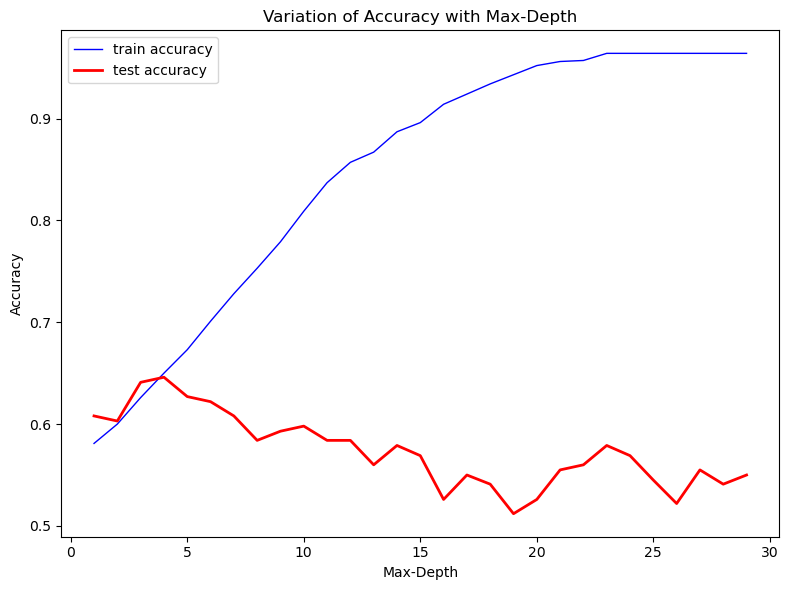

In [35]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth, criterion='gini')
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

Confusion Matrix for Train Set


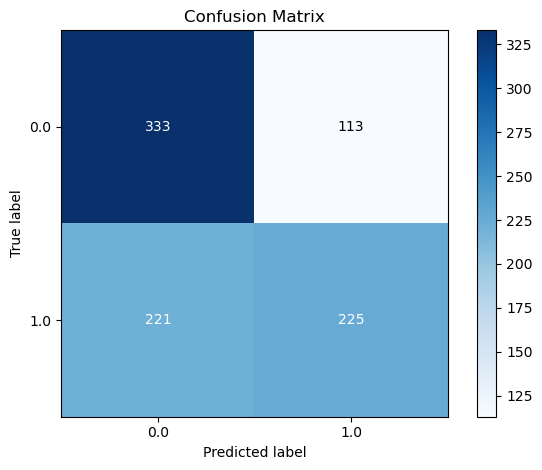

In [36]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
y_pred = best_grid_dt.predict(X_train)
pd. DataFrame (confusion_matrix(y_train, y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')

In [37]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))


Confusion Matrix for Test Set


0   1
0  90  37
1  38  44

In [38]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))
print("Accuracy Score {}".format(accuracy_score(y_train,best_grid_dt.predict(X_train))))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67       446
         1.0       0.67      0.50      0.57       446

    accuracy                           0.63       892
   macro avg       0.63      0.63      0.62       892
weighted avg       0.63      0.63      0.62       892

Accuracy Score 0.625560538116592


In [39]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))
print("Accuracy Score {}".format(accuracy_score(y_test,best_grid_dt.predict(X_test))))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71       127
         1.0       0.54      0.54      0.54        82

    accuracy                           0.64       209
   macro avg       0.62      0.62      0.62       209
weighted avg       0.64      0.64      0.64       209

Accuracy Score 0.6411483253588517


## Hyperparameter Tuning on Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [42]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [43]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=50)

In [44]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=50)

### Train Set

[[406  40]
 [ 68 378]]
Accuracy Score 0.8789237668161435
Classification report: 
              precision    recall  f1-score   support

         0.0      0.857     0.910     0.883       446
         1.0      0.904     0.848     0.875       446

    accuracy                          0.879       892
   macro avg      0.880     0.879     0.879       892
weighted avg      0.880     0.879     0.879       892



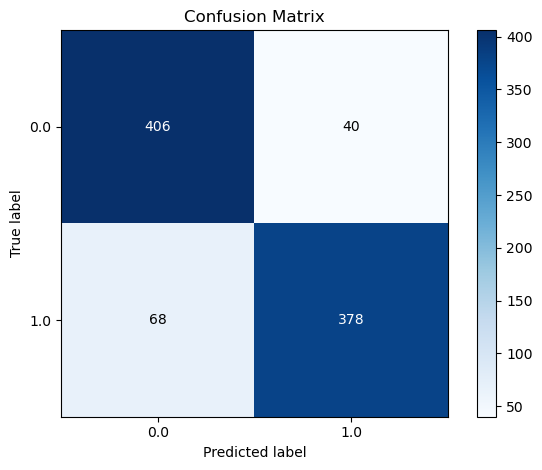

In [45]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred,digits=3)))

### Test Set

In [46]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred,digits=3)))

[[82 45]
 [36 46]]
Accuracy Score 0.6124401913875598
Classification report: 
              precision    recall  f1-score   support

         0.0      0.695     0.646     0.669       127
         1.0      0.505     0.561     0.532        82

    accuracy                          0.612       209
   macro avg      0.600     0.603     0.601       209
weighted avg      0.621     0.612     0.615       209



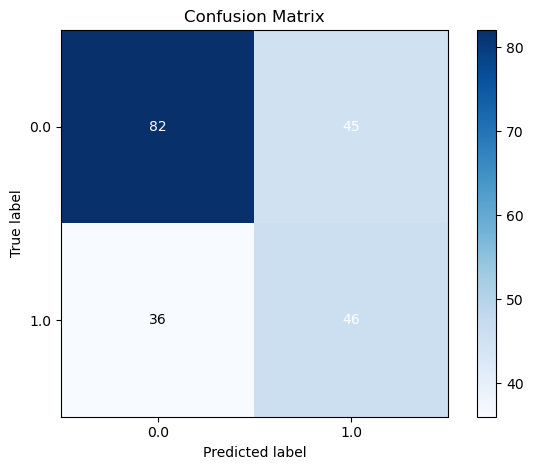

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q2')

## Hyperparameter Tuning on Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [50]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_featu

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; tota

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaco

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [51]:
# Finding out the best estimator
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty='l1', solver='liblinear')

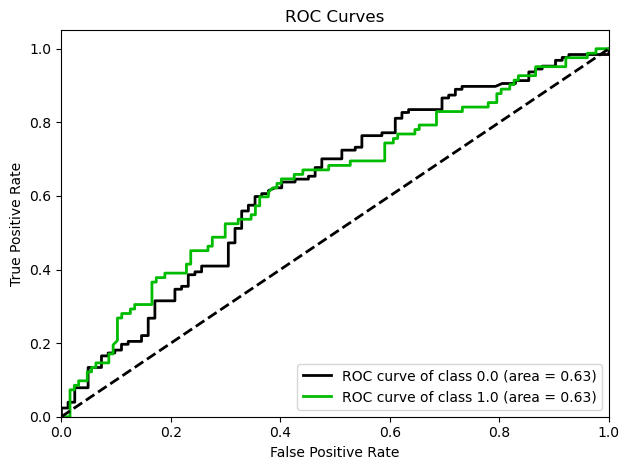

In [52]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q2')
plt.show();

# Applying the best grid for logistic regression

In [53]:
best_grid_lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

### Train Set

[[271 175]
 [171 275]]
Accuracy Score 0.6121076233183856
Classification report: 
              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61       446
         1.0       0.61      0.62      0.61       446

    accuracy                           0.61       892
   macro avg       0.61      0.61      0.61       892
weighted avg       0.61      0.61      0.61       892



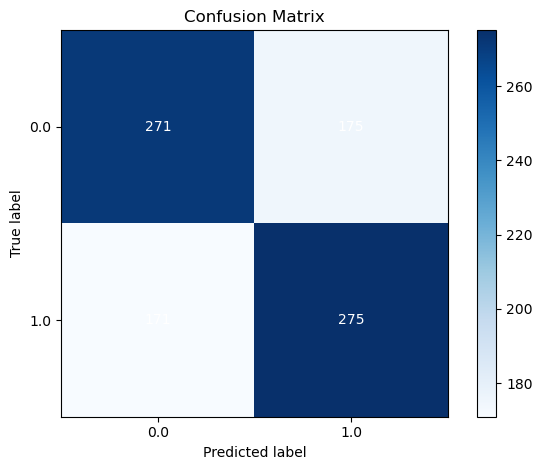

In [54]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[73 54]
 [32 50]]
Accuracy Score 0.5885167464114832
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63       127
         1.0       0.48      0.61      0.54        82

    accuracy                           0.59       209
   macro avg       0.59      0.59      0.58       209
weighted avg       0.61      0.59      0.59       209



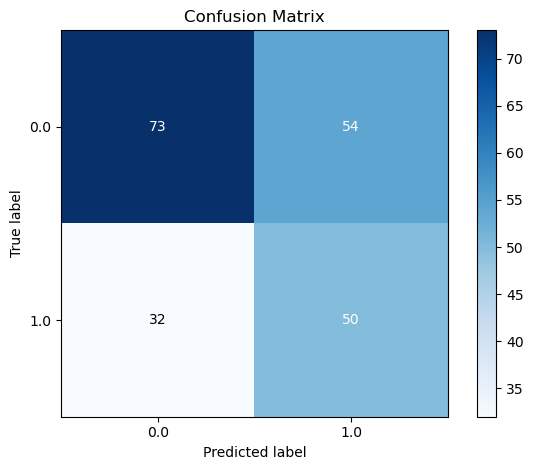

In [55]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [56]:
from sklearn.svm import SVC

In [57]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [58]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; tota

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=10, max_features

[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=No

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total 

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features

[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion

[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........penalty=l1, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l1, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l1, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l1, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l2, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ..........penalty=l2, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ......p

[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END

[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END

[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [59]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, gamma='auto', kernel='sigmoid', probability=True,
    random_state=42)

# Applying the best grid for SVM

In [60]:
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, gamma='auto', kernel='sigmoid', probability=True,
    random_state=42)

### Train Set

[[270 176]
 [166 280]]
Accuracy Score 0.6165919282511211
Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.61      0.61       446
         1.0       0.61      0.63      0.62       446

    accuracy                           0.62       892
   macro avg       0.62      0.62      0.62       892
weighted avg       0.62      0.62      0.62       892



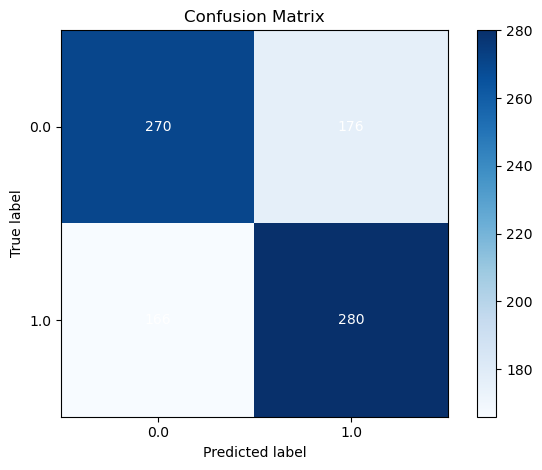

In [61]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[77 50]
 [34 48]]
Accuracy Score 0.5980861244019139
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.61      0.65       127
         1.0       0.49      0.59      0.53        82

    accuracy                           0.60       209
   macro avg       0.59      0.60      0.59       209
weighted avg       0.61      0.60      0.60       209



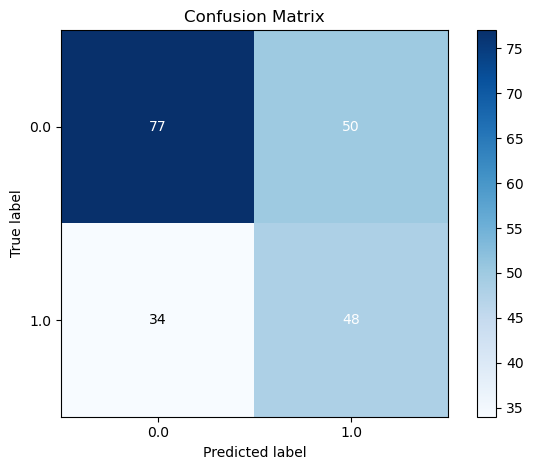

In [62]:
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVM hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [63]:
from  sklearn.naive_bayes import MultinomialNB

In [64]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [65]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [66]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(alpha=0.1, fit_prior=False)

In [67]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.1, fit_prior=False)

### Train Set

[[281 165]
 [198 248]]
Accuracy Score 0.5930493273542601
Classification report: 
              precision    recall  f1-score   support

         0.0      0.587     0.630     0.608       446
         1.0      0.600     0.556     0.577       446

    accuracy                          0.593       892
   macro avg      0.594     0.593     0.592       892
weighted avg      0.594     0.593     0.592       892



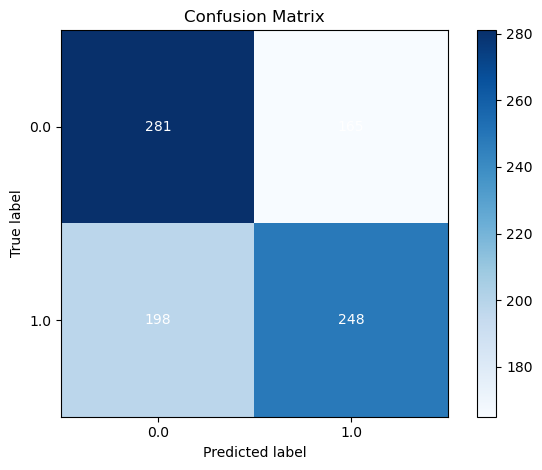

In [68]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred,digits=3)))

### Test Set

[[84 43]
 [46 36]]
Accuracy Score 0.5741626794258373
Classification report: 
              precision    recall  f1-score   support

         0.0      0.646     0.661     0.654       127
         1.0      0.456     0.439     0.447        82

    accuracy                          0.574       209
   macro avg      0.551     0.550     0.550       209
weighted avg      0.571     0.574     0.573       209



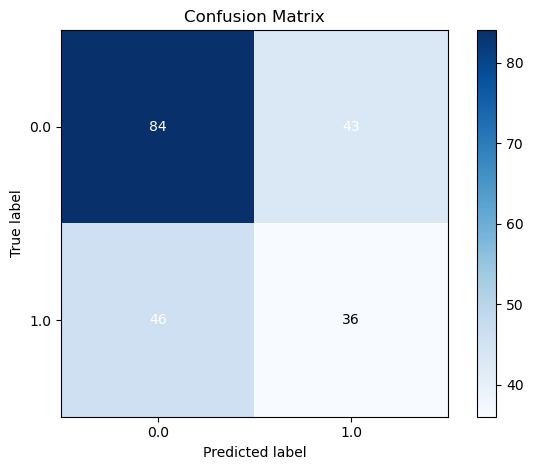

In [69]:

y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for test set MultinomialNB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred,digits=3)))


## ensemble learning

In [70]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard voting classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='sqrt',
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, gamma='auto',
                                  kernel='sigmoid', probability=True,
                                  random_state=42)),
                             ('nb', MultinomialNB(alpha=0.1, fit_prior=False))])

In [72]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6172248803827751
DecisionTreeClassifier 0.6411483253588517
LogisticRegression 0.5885167464114832
RandomForestClassifier 0.6172248803827751
SVC 0.5980861244019139
MultinomialNB 0.5741626794258373
VotingClassifier 0.6411483253588517


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.6860986547085202
Classification report: 
              precision    recall  f1-score   support

         0.0       0.66      0.76      0.71       446
         1.0       0.72      0.61      0.66       446

    accuracy                           0.69       892
   macro avg       0.69      0.69      0.68       892
weighted avg       0.69      0.69      0.68       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

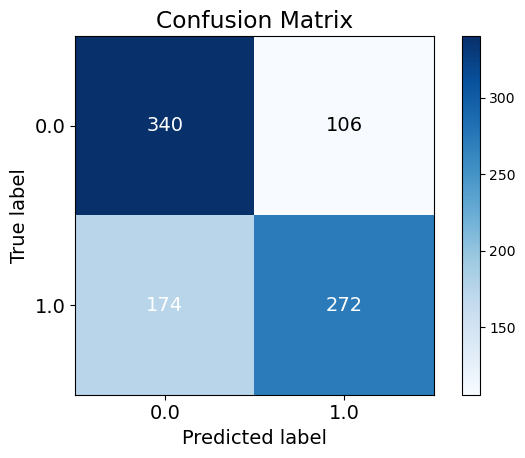

In [73]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.6411483253588517
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70       127
         1.0       0.54      0.55      0.55        82

    accuracy                           0.64       209
   macro avg       0.62      0.62      0.62       209
weighted avg       0.64      0.64      0.64       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


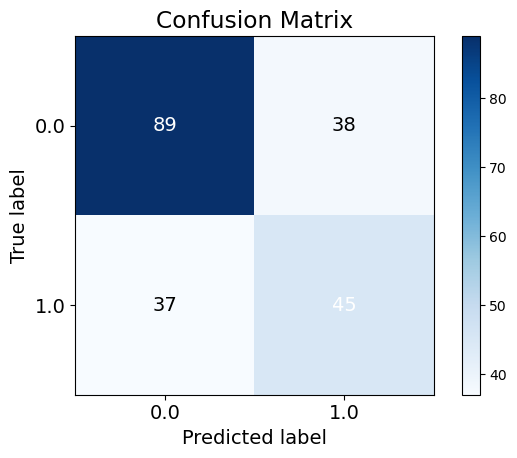

In [74]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [75]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='sqrt',
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, gamma='auto',
                                  kernel='sigmoid', probability=True,
                                  random_state=42)),
                             ('nb', MultinomialNB(alpha=0.1, fit_prior=False))],
                 voting='soft')

In [76]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6172248803827751
DecisionTreeClassifier 0.6411483253588517
LogisticRegression 0.5885167464114832
RandomForestClassifier 0.583732057416268
SVC 0.5980861244019139
MultinomialNB 0.5741626794258373
VotingClassifier 0.6267942583732058


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.6860986547085202
Classification report: 
              precision    recall  f1-score   support

         0.0      0.661     0.762     0.708       446
         1.0      0.720     0.610     0.660       446

    accuracy                          0.686       892
   macro avg      0.691     0.686     0.684       892
weighted avg      0.691     0.686     0.684       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

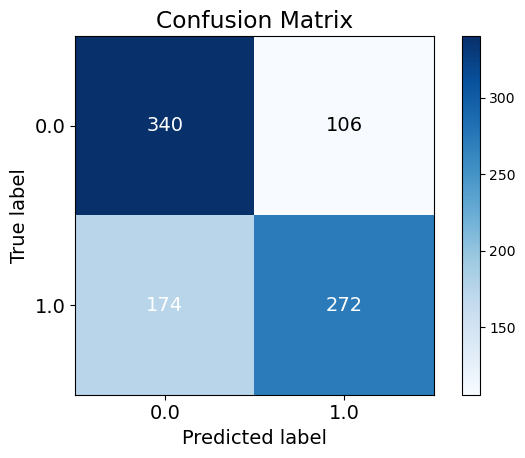

In [77]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train),digits=3)))

### Test Set

Accuracy Score 0.6267942583732058
Classification report: 
              precision    recall  f1-score   support

         0.0      0.725     0.622     0.669       127
         1.0      0.520     0.634     0.571        82

    accuracy                          0.627       209
   macro avg      0.622     0.628     0.620       209
weighted avg      0.644     0.627     0.631       209



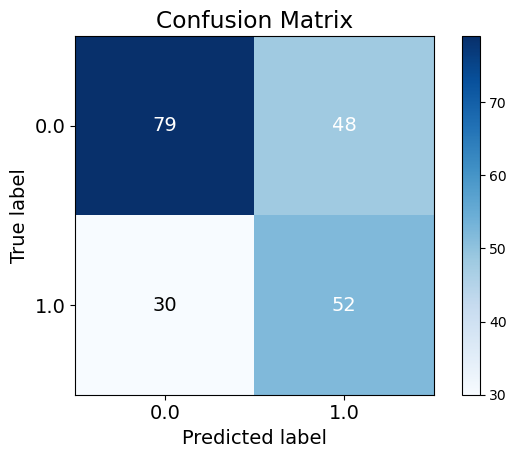

In [78]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test),digits=3)))

## bagging and pasting

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [80]:
bag_clf = BaggingClassifier(best_grid_dt, n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.5986547085201793
Test Accuracy 0.5885167464114832


Accuracy Score 0.5885167464114832
Classification report: 
              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64       127
         1.0       0.48      0.57      0.52        82

    accuracy                           0.59       209
   macro avg       0.58      0.59      0.58       209
weighted avg       0.60      0.59      0.59       209



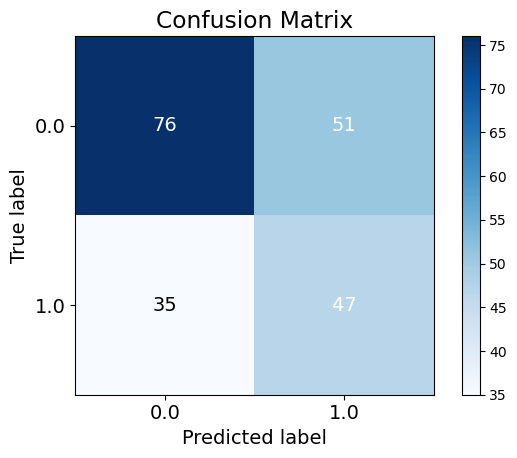

In [81]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q2')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

## impact of no. of estimators

In [82]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.6905829596412556  test acc =  0.6411483253588517 oob =  0.5930493273542601
Num of estimators:  100  train acc =  0.6973094170403588  test acc =  0.631578947368421 oob =  0.5840807174887892
Num of estimators:  150  train acc =  0.7006726457399103  test acc =  0.6363636363636364 oob =  0.594170403587444
Num of estimators:  200  train acc =  0.6995515695067265  test acc =  0.645933014354067 oob =  0.5975336322869955
Num of estimators:  250  train acc =  0.695067264573991  test acc =  0.631578947368421 oob =  0.5997757847533632
Num of estimators:  300  train acc =  0.6984304932735426  test acc =  0.6363636363636364 oob =  0.5975336322869955
Num of estimators:  350  train acc =  0.6973094170403588  test acc =  0.6267942583732058 oob =  0.6031390134529148
Num of estimators:  400  train acc =  0.6995515695067265  test acc =  0.631578947368421 oob =  0.6031390134529148
Num of estimators:  450  train acc =  0.6961883408071748  test acc =  0.636363636363636

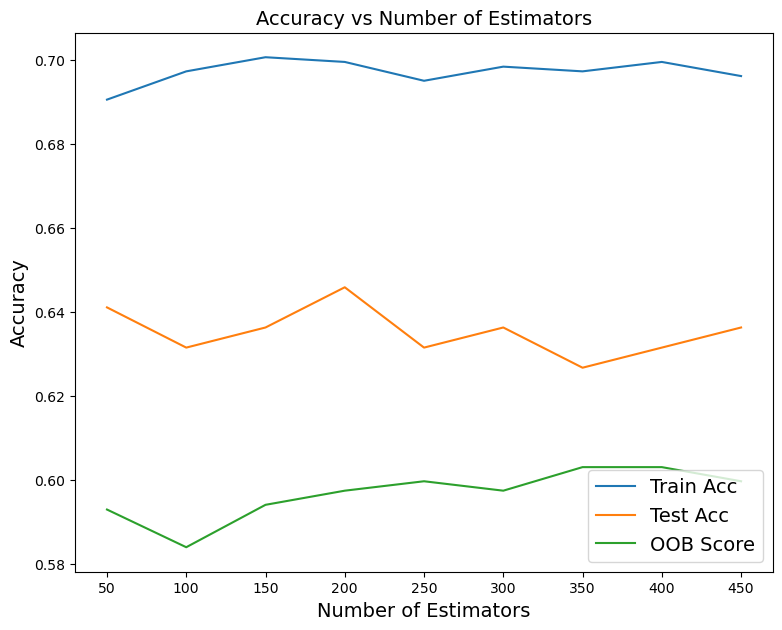

In [83]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6076555023923444

### Train Set

Accuracy Score 0.6659192825112108
Classification report: 
              precision    recall  f1-score   support

         0.0       0.67      0.66      0.66       446
         1.0       0.66      0.67      0.67       446

    accuracy                           0.67       892
   macro avg       0.67      0.67      0.67       892
weighted avg       0.67      0.67      0.67       892



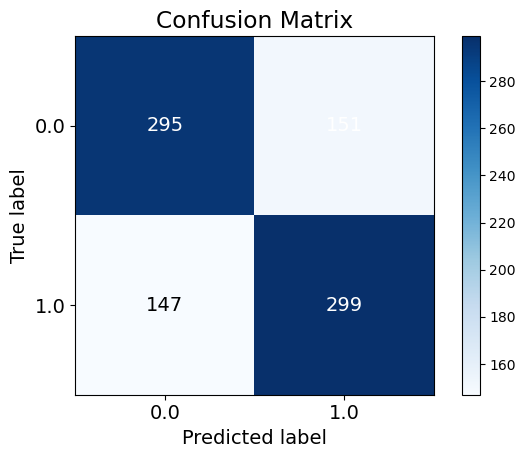

In [85]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

### Test Set

Accuracy Score 0.6076555023923444
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.61      0.65       127
         1.0       0.50      0.61      0.55        82

    accuracy                           0.61       209
   macro avg       0.60      0.61      0.60       209
weighted avg       0.63      0.61      0.61       209



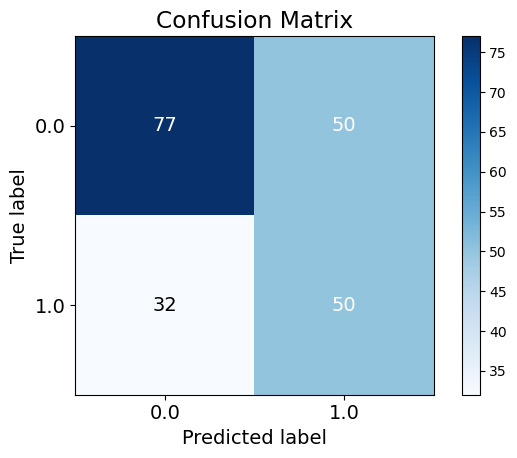

In [86]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [87]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

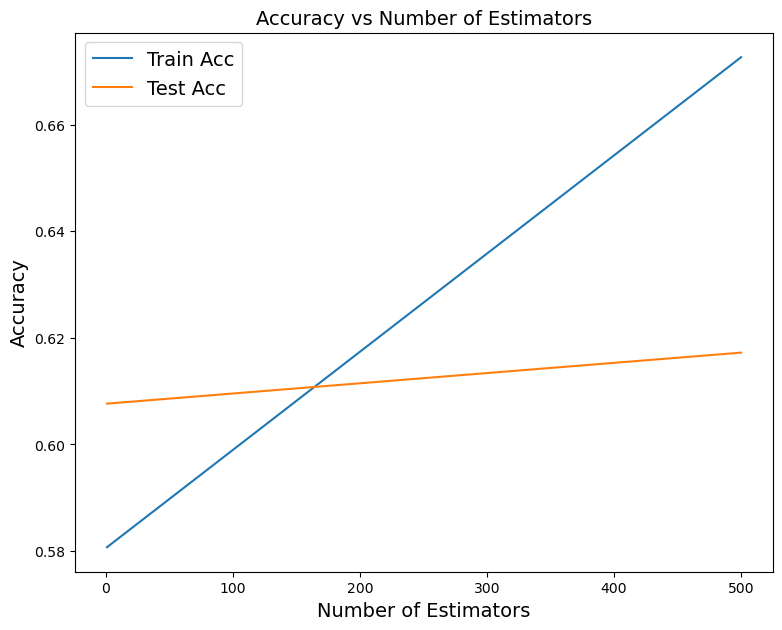

In [88]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

#conda install -c conda-forge xgboost

In [89]:
import xgboost as xgb
print (xgb)

<module 'xgboost' from '/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/xgboost/__init__.py'>


In [90]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.5502392344497608

### Train Set

Accuracy Score 0.9002242152466368
Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       446
         1.0       0.93      0.87      0.90       446

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



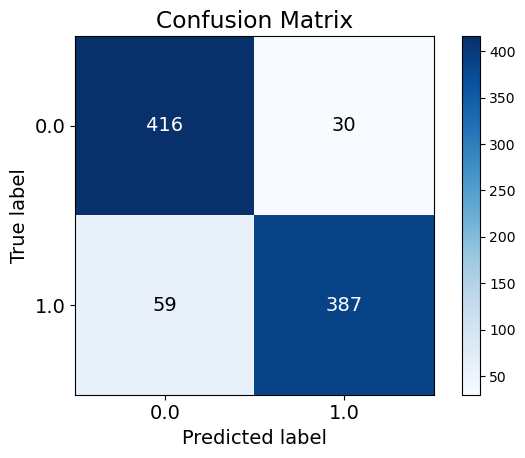

In [91]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.5502392344497608
Classification report: 
              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61       127
         1.0       0.44      0.51      0.47        82

    accuracy                           0.55       209
   macro avg       0.54      0.54      0.54       209
weighted avg       0.56      0.55      0.55       209



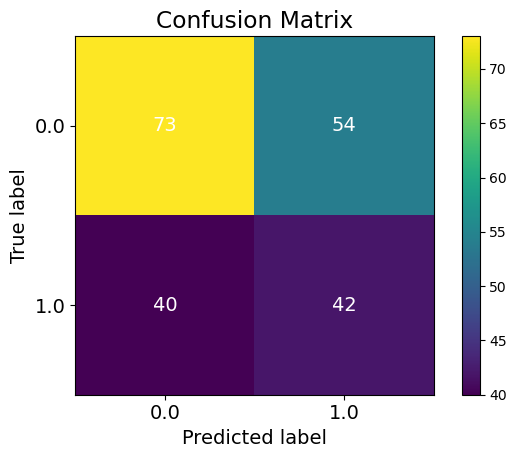

In [92]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test), cmap='viridis');
save_fig('Test Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [93]:
#conda install -c conda-forge ds-lime

In [94]:
from lime.lime_tabular import LimeTabularExplainer

In [95]:
feature_names = X_train.columns
#X_train.columns.values.tolist()

In [96]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [97]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [98]:
# Generate explanations using LIME
#Since our accuracy is the highest for Multinomial Naive Bayes, we will be using Multinomial Naive Bayes to interpret 
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.14533e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [99]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.46410069 0.53589931]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
studytime > 0.33 -0.09426196672683275
schoolsup_yes <= 0.00 0.07136410158442867
0.50 < G3 <= 0.55 0.06089918288926715
0.47 < G1 <= 0.58 0.022601700146367178
0.04 < absences <= 0.11 0.020604804016134456
paid_yes > 0.00 0.02042927805285868
failures <= 0.00 -0.02019373538843693
0.47 < G2 <= 0.58 -0.009025020102748945
higher_yes <= 1.00 0.0


### Feature Importance Plot

In [101]:
feature_importance = explanation_lime.as_list()

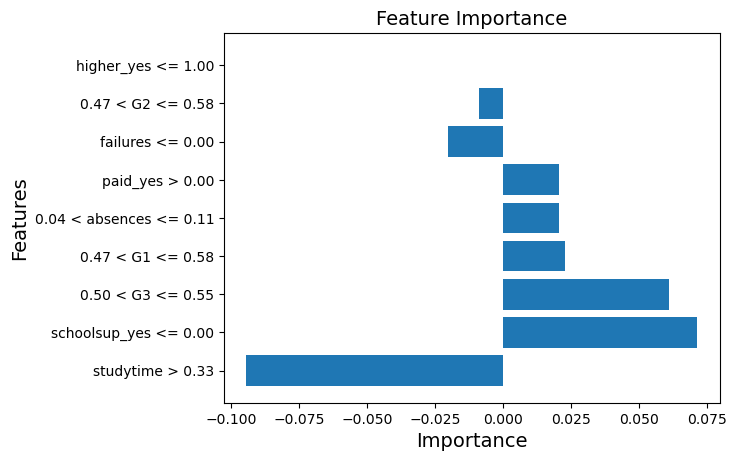

In [102]:
features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 2/LIME Feature Importance q2.png')
plt.show()


### LIME Explanation Plot

In [103]:
feature_contributions = explanation_lime.local_exp[1]

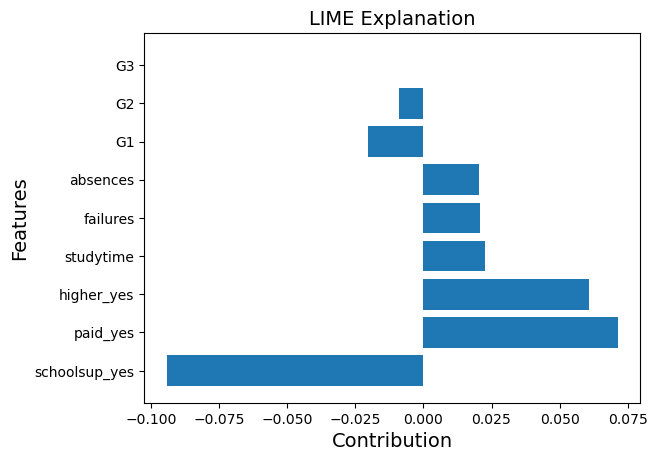

In [104]:
features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 2/LIME Explanation Graph q2.png')
plt.show()

## Explanation for class 1

In [105]:
#Perform the explanation on the 0th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[0], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explaination.show_in_notebook(show_table = True, show_all = False)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 1 q2.html')

Predicted:  1.0
Actual:  1.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.92718e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## Explanation for class 0

In [106]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 0 q2.html')

Predicted:  0.0
Actual:  0.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.41392e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


# SHAP

In [107]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

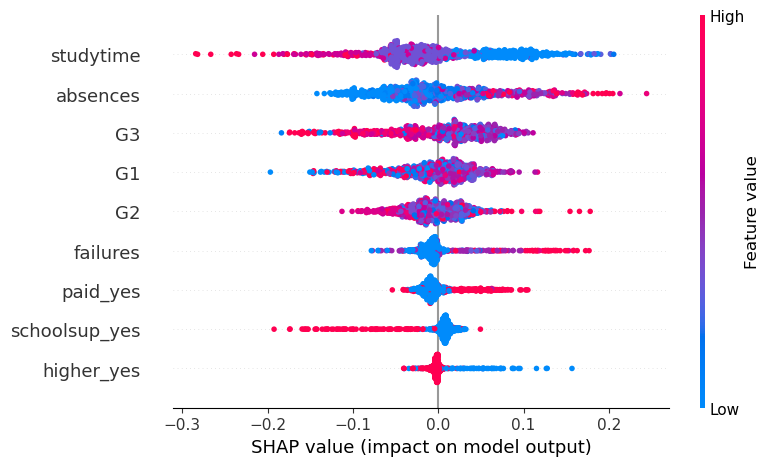

[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_t

[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total t

[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=liblinear; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cg; t

[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=

[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total 

In [108]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1], show=False)
plt.savefig('images/question 2/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')